In [1]:
import os
import datetime   
import pandas as pd

In [2]:
path_of_the_directory = './dataset/formatted/'

In [3]:
ramangr = pd.DataFrame()

In [5]:
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f) & filename.endswith("xlsx"):
        ds = pd.read_excel(f, header=1)
        ds['Market'].ffill(inplace=True)
        ds_rmngr = ds[ds['Market']=='RAMANAGARA']
        ds_blr = ds[ds['Market']=='BENGALURU']
        if ds_blr.shape[0] > ds_rmngr.shape[0]:
            ds_rmngr = ds_blr
        
        if filename.lower().find("beans") > -1:
            ds_rmngr.loc[:, 'modal_beans'] = ds_rmngr.pop('Modal')
            ds_rmngr.loc[:, 'min_beans'] = ds_rmngr.pop('Min')
            ds_rmngr.loc[:, 'max_beans'] = ds_rmngr.pop('Max')
            ds_rmngr.loc[:, 'Arrivals_beans'] = ds_rmngr.pop('Arrivals')
        elif filename.lower().find("brinjal") > -1:
            ds_rmngr.loc[:, 'modal_brinjal'] = ds_rmngr.pop('Modal')
            ds_rmngr.loc[:, 'min_brinjal'] = ds_rmngr.pop('Min')
            ds_rmngr.loc[:, 'max_brinjal'] = ds_rmngr.pop('Max')
            ds_rmngr.loc[:, 'Arrivals_brinjal'] = ds_rmngr.pop('Arrivals')
        elif filename.lower().find("ragi") > -1:
            ds_rmngr.loc[:, 'modal_ragi'] = ds_rmngr.pop('Modal')
            ds_rmngr.loc[:, 'min_ragi'] = ds_rmngr.pop('Min')
            ds_rmngr.loc[:, 'max_ragi'] = ds_rmngr.pop('Max')
            ds_rmngr.loc[:, 'Arrivals_ragi'] = ds_rmngr.pop('Arrivals')
            
        ramangr = pd.concat([ramangr, ds_rmngr])
        
print("total records", ramangr.shape[0], "total features", ramangr.shape[1], "features", ramangr.columns)
            

/Users/karthikh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


total records 8763 total features 18 features Index(['Market', 'Date', 'Variety', 'Grade', 'Unit', 'District',
       'modal_brinjal', 'min_brinjal', 'max_brinjal', 'Arrivals_brinjal',
       'modal_ragi', 'min_ragi', 'max_ragi', 'Arrivals_ragi', 'modal_beans',
       'min_beans', 'max_beans', 'Arrivals_beans'],
      dtype='object')


Price type conversion

In [6]:
ramangr['modal_beans'] = pd.to_numeric(ramangr['modal_beans'])
ramangr['min_beans'] = pd.to_numeric(ramangr['min_beans'])
ramangr['max_beans'] = pd.to_numeric(ramangr['max_beans'])
ramangr['Arrivals_beans'] = pd.to_numeric(ramangr['Arrivals_beans'])

ramangr['modal_brinjal'] = pd.to_numeric(ramangr['modal_brinjal'])
ramangr['min_brinjal'] = pd.to_numeric(ramangr['min_brinjal'])
ramangr['max_brinjal'] = pd.to_numeric(ramangr['max_brinjal'])
ramangr['Arrivals_brinjal'] = pd.to_numeric(ramangr['Arrivals_brinjal'])

ramangr['modal_ragi'] = pd.to_numeric(ramangr['modal_ragi'])
ramangr['min_ragi'] = pd.to_numeric(ramangr['min_ragi'])
ramangr['max_ragi'] = pd.to_numeric(ramangr['max_ragi'])
ramangr['Arrivals_ragi'] = pd.to_numeric(ramangr['Arrivals_ragi'])

ramangr.dtypes

Market               object
Date                 object
Variety              object
Grade                object
Unit                 object
District             object
modal_brinjal       float64
min_brinjal         float64
max_brinjal         float64
Arrivals_brinjal    float64
modal_ragi          float64
min_ragi            float64
max_ragi            float64
Arrivals_ragi       float64
modal_beans         float64
min_beans           float64
max_beans           float64
Arrivals_beans      float64
dtype: object

In [7]:
ramangr.index = pd.to_datetime(ramangr.pop('Date'), format='%d.%m.%Y %H:%M:%S')

In [8]:
df = ramangr.resample('B').mean()
df = df.ffill()

In [9]:
reidx = pd.period_range(df.index.min(), df.index.max())
reidx = reidx.astype(str)
reidx = pd.to_datetime(reidx)
df = df.reindex(reidx, method='ffill')
df.sort_index()

,modal_brinjal,min_brinjal,max_brinjal,Arrivals_brinjal,modal_ragi,min_ragi,max_ragi,Arrivals_ragi,modal_beans,min_beans,max_beans,Arrivals_beans
2009-01-01,1000.0,900.0,1100.0,6.0,950.0,900.0,1000.0,55.0,1100.0,1000.0,1200.0,15.0
2009-01-02,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-03,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-04,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-05,1100.0,1000.0,1200.0,4.0,950.0,900.0,1000.0,112.0,1100.0,1000.0,1200.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,3600.0,3200.0,4000.0,16.0,3050.0,2800.0,3300.0,227.0,1400.0,1200.0,1600.0,14.0
2020-01-28,3600.0,3200.0,4000.0,12.0,3050.0,2800.0,3300.0,177.0,1400.0,1200.0,1600.0,14.0
2020-01-29,3600.0,3200.0,4000.0,18.0,3050.0,2800.0,3300.0,124.0,1400.0,1200.0,1600.0,14.0
2020-01-30,3000.0,2800.0,3200.0,16.0,3050.0,2800.0,3300.0,141.0,1400.0,1200.0,1600.0,14.0


In [10]:
# df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
# df = df.ffill().sort_index()
# df.isnull().sum()

Scale Down

In [11]:
# df['Arrivals_beans'] = df['Arrivals_beans'] / 10
# df['Arrivals_brinjal'] = df['Arrivals_brinjal']/10
# df['Arrivals_ragi'] = df['Arrivals_ragi'] / 10

# df['modal_beans'] = df['modal_beans']/100
# df['modal_brinjal'] = df['modal_brinjal']/100
# df['modal_ragi'] = df['modal_ragi']/100

# df['min_beans'] = df['min_beans']/100
# df['min_brinjal'] = df['min_brinjal']/100
# df['min_ragi'] = df['min_ragi']/100

# df['max_brinjal'] = df['max_brinjal']/100
# df['max_beans'] = df['max_beans']/100
# df['max_ragi'] = df['max_ragi']/100

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
modal_brinjal,4048.0,1308.894516,710.172688,260.0,800.0,1100.0,1650.00,6000.0
min_brinjal,4048.0,1135.809536,647.141413,12.0,700.0,1000.0,1500.00,5000.0
max_brinjal,4048.0,1477.172678,781.973608,300.0,900.0,1200.0,1800.00,7000.0
Arrivals_brinjal,4048.0,12.153780,8.464355,0.0,8.0,11.5,16.00,400.0
modal_ragi,4048.0,2069.420331,795.945640,810.0,1200.0,2050.0,2900.00,3900.0
min_ragi,4048.0,1935.111413,765.771109,750.0,1100.0,1900.0,2762.50,3800.0
max_ragi,4048.0,2215.898839,820.719479,860.0,1300.0,2200.0,3000.00,4000.0
Arrivals_ragi,4048.0,268.317811,290.482019,0.0,145.0,231.0,336.25,13062.0
modal_beans,4048.0,2506.765069,1655.048300,600.0,1400.0,1900.0,3300.00,13000.0
min_beans,4048.0,2201.438982,1489.531925,400.0,1200.0,1600.0,2900.00,12000.0


Scale down values : Arrival in terms of 10, price in terms of 100

In [13]:
df.head()

,modal_brinjal,min_brinjal,max_brinjal,Arrivals_brinjal,modal_ragi,min_ragi,max_ragi,Arrivals_ragi,modal_beans,min_beans,max_beans,Arrivals_beans
2009-01-01,1000.0,900.0,1100.0,6.0,950.0,900.0,1000.0,55.0,1100.0,1000.0,1200.0,15.0
2009-01-02,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-03,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-04,1050.0,975.0,1125.0,4.0,950.0,900.0,1000.0,494.0,1100.0,1000.0,1200.0,16.0
2009-01-05,1100.0,1000.0,1200.0,4.0,950.0,900.0,1000.0,112.0,1100.0,1000.0,1200.0,8.0


In [14]:
# weather_df_rsmpl = weather_df.resample('B').mean()

In [15]:
df.shape

(4048, 12)

In [16]:
df.isnull().sum()

modal_brinjal       0
min_brinjal         0
max_brinjal         0
Arrivals_brinjal    0
modal_ragi          0
min_ragi            0
max_ragi            0
Arrivals_ragi       0
modal_beans         0
min_beans           0
max_beans           0
Arrivals_beans      0
dtype: int64

In [18]:
weather_df = pd.read_csv('./dataset/bengaluru.csv')
weather_df = weather_df.loc[:, weather_df.columns != 'Date']
weather_df.index = pd.to_datetime(weather_df.date_time, format='%Y.%m.%d %H:%M:%S')
weather_df_rsmpl = weather_df.resample('B').mean()
weather_df_rsmpl.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2009-01-01,27.000000,12.000000,0.0,11.6,5.000000,3.791667,31.0,13.750000,21.416667,21.708333,21.500000,11.041667,6.958333,66.500000,0.000000,1013.875000,19.041667,8.583333,84.208333,6.708333
2009-01-02,26.333333,15.333333,0.0,11.6,5.333333,3.805556,45.0,14.458333,21.236111,21.513889,21.083333,11.888889,38.861111,69.402778,0.000000,1014.527778,20.527778,8.305556,94.180556,7.972222
2009-01-05,28.000000,16.000000,0.0,11.6,5.000000,3.833333,60.0,14.291667,21.625000,21.666667,21.625000,11.416667,25.125000,67.083333,0.000000,1012.708333,20.666667,8.750000,104.875000,7.500000
2009-01-06,28.000000,13.000000,0.0,11.6,5.000000,3.791667,67.0,11.958333,21.416667,21.666667,21.625000,12.041667,5.083333,60.458333,0.000000,1012.875000,19.791667,9.000000,105.500000,6.916667
2009-01-07,26.000000,15.000000,0.0,10.2,5.000000,3.333333,74.0,15.916667,20.333333,20.375000,20.166667,11.916667,56.208333,79.291667,0.008333,1014.166667,19.708333,8.625000,110.916667,8.291667


In [19]:
reidx = pd.period_range(df.index.min(), df.index.max())
reidx = reidx.astype(str)
reidx = pd.to_datetime(reidx)
weather_df_rsmpl = weather_df_rsmpl.reindex(reidx, method='ffill')


In [20]:
print(df.shape, weather_df_rsmpl.shape)
print(df.index.dtype, weather_df_rsmpl.index.dtype)

(4048, 12) (4048, 20)
datetime64[ns] datetime64[ns]


In [21]:
mkt_wtr_df = pd.concat([df, weather_df_rsmpl], axis=1)

In [22]:
mkt_wtr_df.isnull().sum()

modal_brinjal        0
min_brinjal          0
max_brinjal          0
Arrivals_brinjal     0
modal_ragi           0
min_ragi             0
max_ragi             0
Arrivals_ragi        0
modal_beans          0
min_beans            0
max_beans            0
Arrivals_beans       0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [23]:
mkt_wtr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
modal_brinjal,4048.0,1308.894516,710.172688,260.000000,800.000000,1100.000000,1650.000000,6000.000000
min_brinjal,4048.0,1135.809536,647.141413,12.000000,700.000000,1000.000000,1500.000000,5000.000000
max_brinjal,4048.0,1477.172678,781.973608,300.000000,900.000000,1200.000000,1800.000000,7000.000000
Arrivals_brinjal,4048.0,12.153780,8.464355,0.000000,8.000000,11.500000,16.000000,400.000000
modal_ragi,4048.0,2069.420331,795.945640,810.000000,1200.000000,2050.000000,2900.000000,3900.000000
min_ragi,4048.0,1935.111413,765.771109,750.000000,1100.000000,1900.000000,2762.500000,3800.000000
max_ragi,4048.0,2215.898839,820.719479,860.000000,1300.000000,2200.000000,3000.000000,4000.000000
Arrivals_ragi,4048.0,268.317811,290.482019,0.000000,145.000000,231.000000,336.250000,13062.000000
modal_beans,4048.0,2506.765069,1655.048300,600.000000,1400.000000,1900.000000,3300.000000,13000.000000
min_beans,4048.0,2201.438982,1489.531925,400.000000,1200.000000,1600.000000,2900.000000,12000.000000


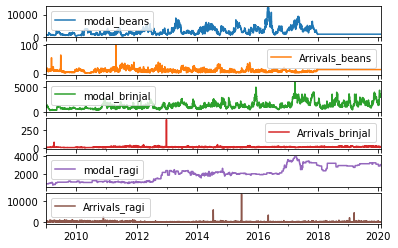

In [24]:
plot_cols = ['modal_beans', 'Arrivals_beans','modal_brinjal', 'Arrivals_brinjal','modal_ragi', 'Arrivals_ragi']
plot_features = mkt_wtr_df[plot_cols]
plot_features.index = mkt_wtr_df.index
_ = plot_features.plot(subplots=True)

mkt_wtr_df.columns

In [25]:
mkt_wtr_df = mkt_wtr_df[['modal_beans', 'min_beans', 'max_beans', 'Arrivals_beans', 'modal_ragi',
       'min_ragi', 'max_ragi', 'Arrivals_ragi', 'modal_brinjal', 'min_brinjal',
       'max_brinjal', 'Arrivals_brinjal', 'sunHour', 'uvIndex', 'DewPointC', 'cloudcover', 'humidity', 'tempC','precipMM', 'pressure', 'winddirDegree', 'windspeedKmph' ]]

In [26]:
mkt_wtr_df.to_csv('./dataset/final_dataset')